In [1]:
import xtrack as xt
import numpy as np

import matplotlib.pyplot as plt

In [2]:
line = xt.Line.from_json('../injection_lines/sps_with_aperture_inj_q20_beam_sagitta2.json')

Loading line from dict:   0%|          | 0/36395 [00:00<?, ?it/s]

Done loading line from dict.           


In [ ]:
tw = line.twiss()
gamma0 = line.particle_ref.gamma0
beta0 = line.particle_ref.beta0
L = line.get_length()

def sweep(line, dR):
    gtr = 1/np.sqrt(tw.momentum_compaction_factor)
    res  = (1 - gamma0**2 / gtr**2) * dR
    res -= 2 * gamma0**2 * beta0**2 / L * dR**2 #should be 2*gamma0**2*beta0**2/(L/2*np.pi)*dR**2
    cav, _ = line.get_elements_of_type(xt.Cavity)
    freq = cav[0].frequency
    return res * freq / L * 2 * np.pi

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [25]:
tt = line.get_table()
bends = np.unique([ttt.split('_')[0].split('..')[0] for ttt in tt.rows['mb.*'].name])
assert np.isclose(np.sum([line[bb].angle for bb in bends]), 2*np.pi)
R = line[bends[0]].length/line[bends[0]].angle
R

741.256800924847

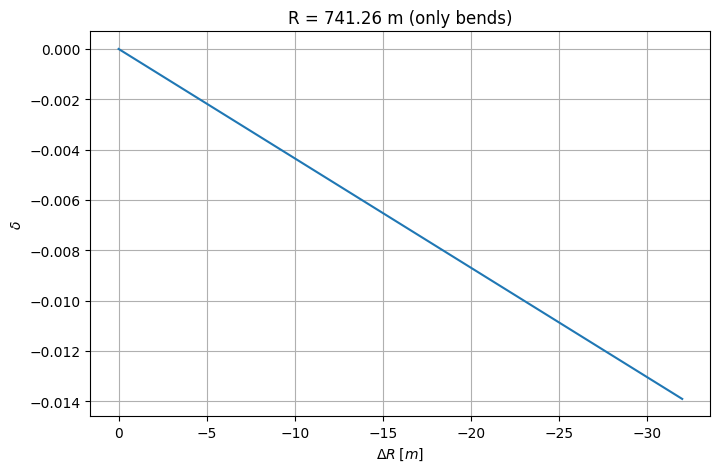

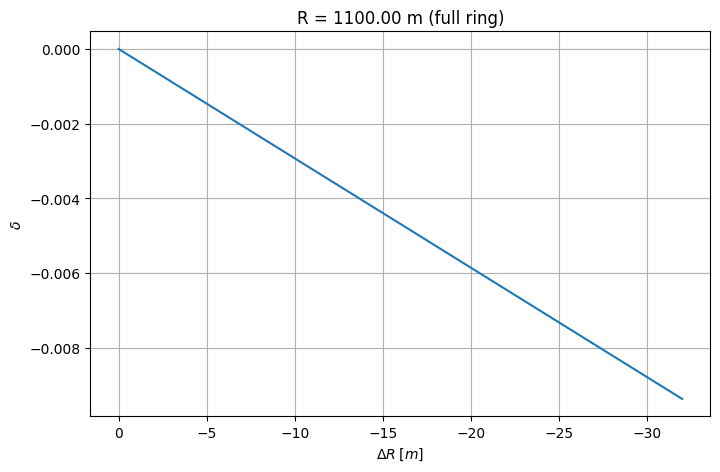

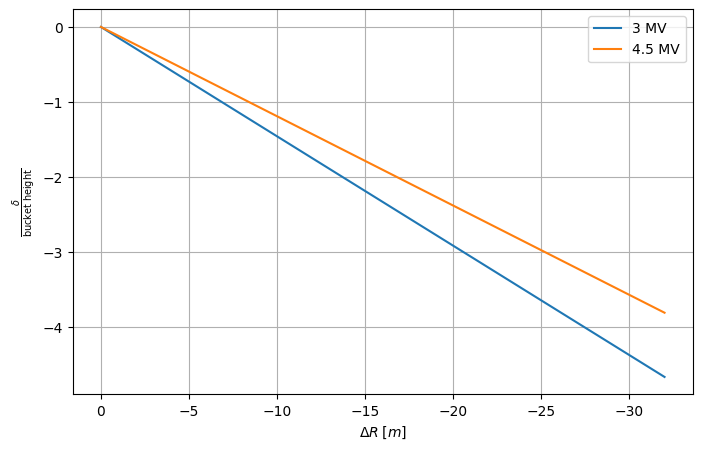

In [45]:
import scipy.constants as sc
# Calculate bucket height
tw_ref = line.twiss()
beta0 = line.particle_ref.beta0[0]
E = line.particle_ref.energy0[0]
q = line.particle_ref.q0
f_RF = 200e6
h = f_RF * line.get_length() / beta0 / sc.c
eta = tw_ref.slip_factor

V_RF = 3e6
bucket_height_3MV = np.sqrt(2*q*V_RF / (np.pi*h*abs(eta)*E*beta0**2))

V_RF = 4.5e6
bucket_height_4_5MV = np.sqrt(2*q*V_RF / (np.pi*h*abs(eta)*E*beta0**2))

rr = np.linspace(-32, 0, 33)
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(rr, rr/1000/tw.momentum_compaction_factor/R)
ax.xaxis.set_inverted(True)
ax.set_xlabel(r'$\Delta R\;[m]$')
ax.set_ylabel(r'$\delta$')
ax.set_title(f'R = {R:.2f} m (only bends)')
ax.grid()
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(rr, rr/1000/tw.momentum_compaction_factor/line.get_length()*2*np.pi)
ax.xaxis.set_inverted(True)
ax.set_xlabel(r'$\Delta R\;[m]$')
ax.set_ylabel(r'$\delta$')
ax.set_title(f'R = {line.get_length()/2/np.pi:.2f} m (full ring)')
ax.grid()
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(rr, rr/1000/tw.momentum_compaction_factor/R/bucket_height_3MV, label='3 MV')
ax.plot(rr, rr/1000/tw.momentum_compaction_factor/R/bucket_height_4_5MV, label='4.5 MV')
ax.xaxis.set_inverted(True)
ax.set_xlabel(r'$\Delta R\;[m]$')
ax.set_ylabel(r'$\frac{\delta}{\text{bucket height}}$')
ax.grid()
ax.legend(loc='upper right')

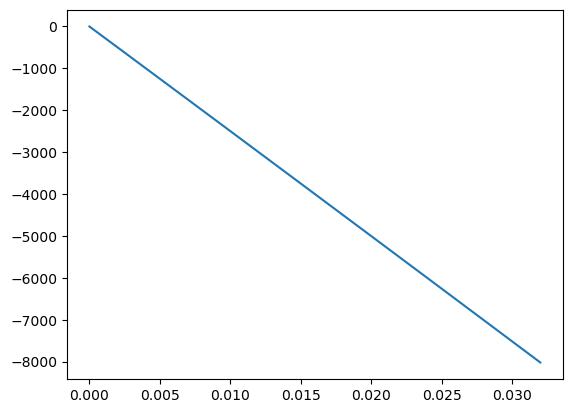

In [7]:
dR = np.linspace(0, 0.032, 100)
plt.plot(dR, sweep(line, dR))

In [15]:
1/tw.momentum_compaction_factor/line.get_length() * 2 * np.pi

0.29292688035838155